# Step 1: Reading and Understanding the Data
#         Starting with the following steps:
#               Importing data using the pandas library
#               Understanding the structure of the data

In [1]:
# Supress the warnings

import warnings as w
w.filterwarnings('ignore')

In [2]:
# importing required packages

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm  

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Reading the input file
bike_data = pd.read_csv(r'D:\Arjun\Upgrad\Assignments\Boob Bikes Demand\day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# check the rows and columns
bike_data.shape

(730, 16)

In [5]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# column datatypes
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Checking missing values
bike_data.isnull().sum()

# No missing values observed in the dataset.

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Renaming columns for better understanding
bike_data.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count'}, inplace=True)
bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
# Mapping possibole numeric values from string for season, month, weathersit, weekday
bike_data['season']=bike_data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_data['month']=bike_data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data['weathersit']=bike_data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bike_data['weekday']=bike_data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike_data.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#  Step 2: Data Visualization

In [10]:
# Identifying Continueous and categorical features.
# checking the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

bike_data.nunique().sort_values()

year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

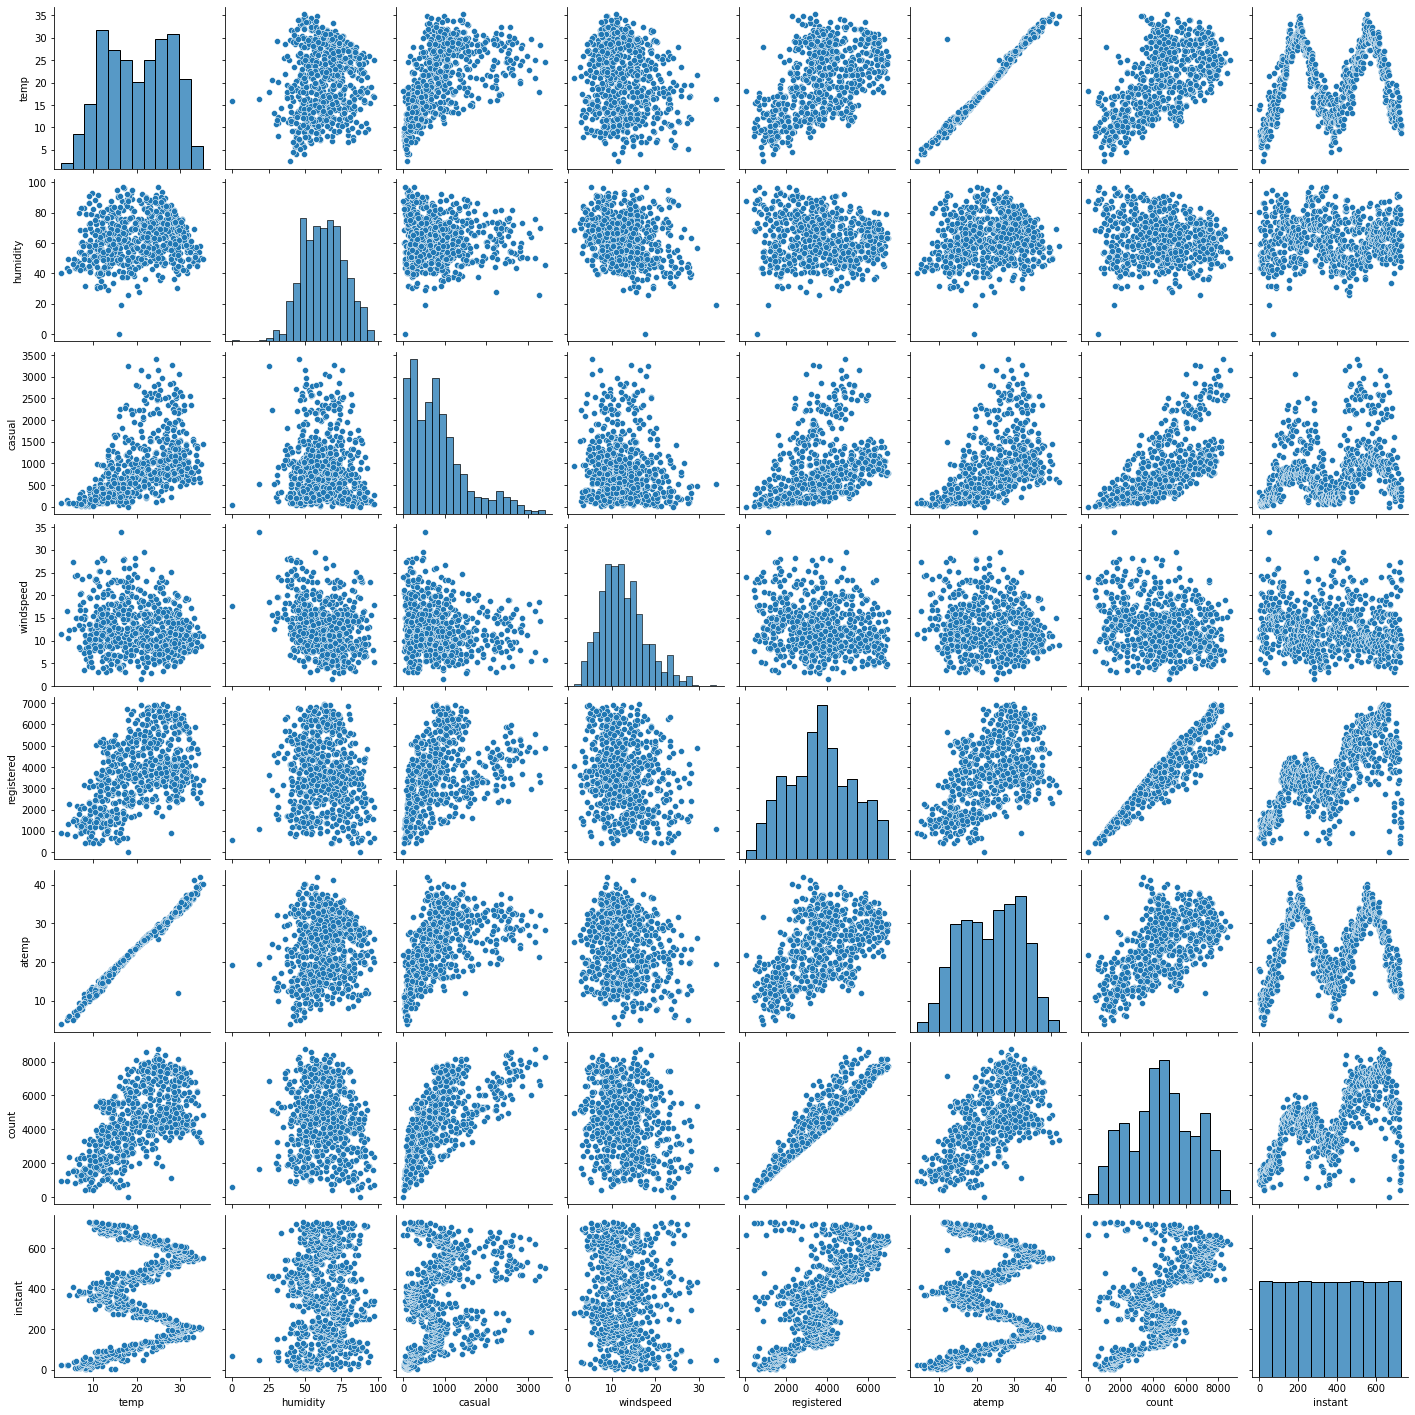

In [11]:
# Visualising Numeric Variables
# Making a pairplot of all the numeric variables, to visualise which variables are most correlated to the target variable 'count'.

sb.pairplot(bike_data, vars=["temp", "humidity",'casual','windspeed','registered','atemp','count','instant'])
plt.show()

## By analysing all the plots above, we can see that there are some independent variables look positively correlated to the 'count' variable.

## Bike rentals are more correlated to temperature

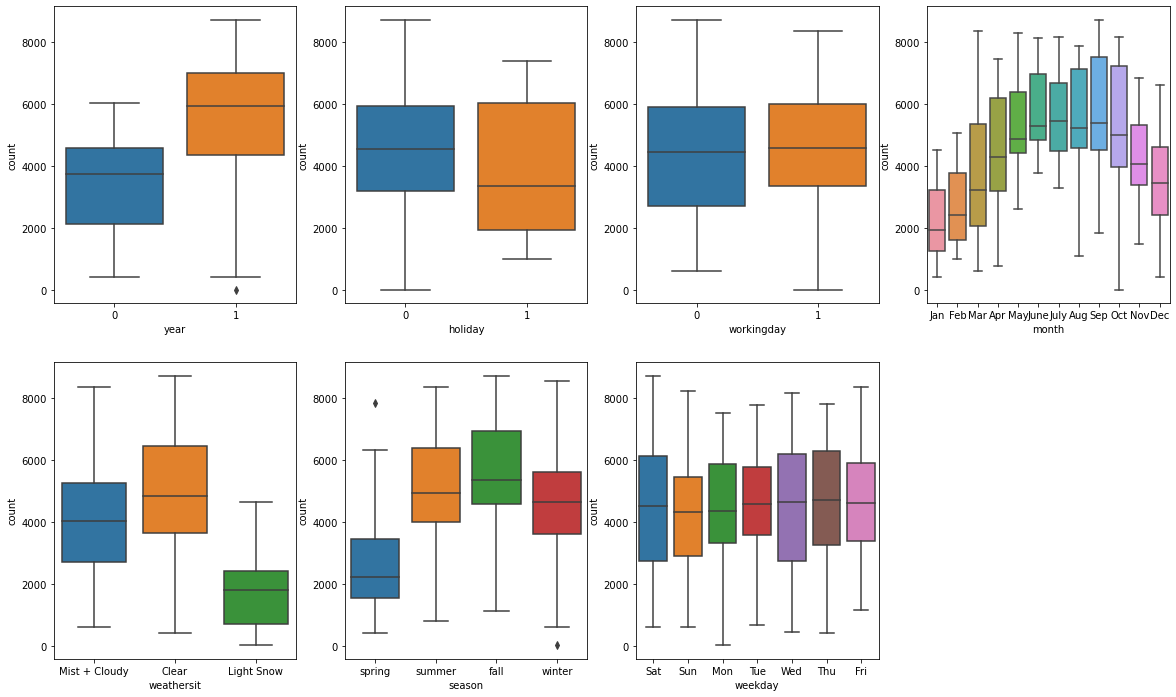

In [12]:
#  Visualizing Categorical Variables
# There are few categorical variables making boxplot for them.
# Checking Relationship between categorical and continueous variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sb.boxplot(x = 'year', y = 'count', data = bike_data)
plt.subplot(2,4,2)
sb.boxplot(x = 'holiday', y = 'count', data = bike_data)
plt.subplot(2,4,3)
sb.boxplot(x = 'workingday', y = 'count', data = bike_data)
plt.subplot(2,4,4)
sb.boxplot(x = 'month', y = 'count', data = bike_data)
plt.subplot(2,4,5)
sb.boxplot(x = 'weathersit', y = 'count', data = bike_data)
plt.subplot(2,4,6)
sb.boxplot(x = 'season', y = 'count', data = bike_data)
plt.subplot(2,4,7)
sb.boxplot(x = 'weekday', y = 'count', data = bike_data)
plt.show()


# The plots above shows the relationship between categorical variables and a Target variable.

# Bike Rentals are more during the fall season and then in summer
# Bike Rentals are more in the year 2019 compared to 2018
# Bike Rentals are more in partly cloudy weather and most in clear weather conditions
# Bike Rentals are more on Saturday,wednesday and thursday

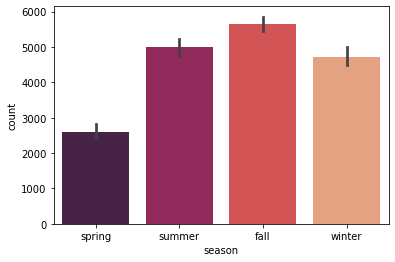

In [13]:
# Understanding the variables
# Season
# Barplot to see relation between season and count of bike rentals
sb.barplot('season','count',data=bike_data,palette="rocket",)
plt.show()

# Rentals are more during the fall season and then in summer

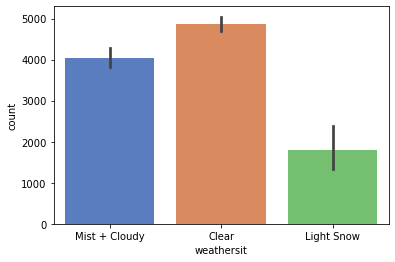

In [14]:
# Weathersit
# Barplot to see relation between weather and count of bike rentals
sb.barplot('weathersit','count',palette="muted",data=bike_data)
plt.show()

# Rentals are max in clear waeather conditions and then is Mist and cloudy weather condition

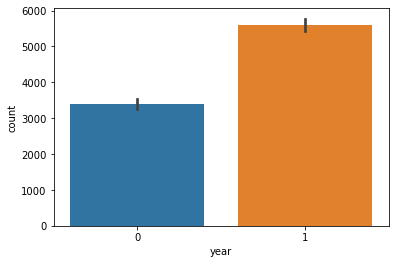

In [15]:
# year
# Barplot to see Relation between Year and count of bike rentals
sb.barplot('year','count',data=bike_data)
plt.show()

# Rentals are more in 2019 compared to 2018

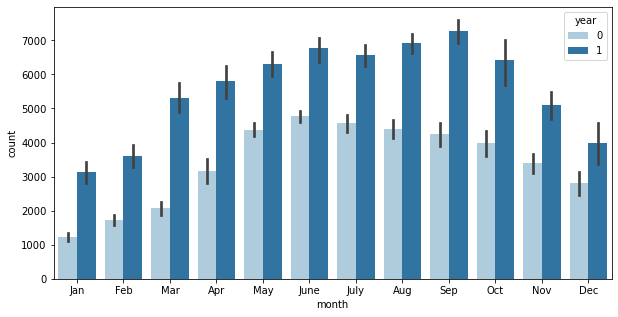

In [16]:
# month
# Barplot to see Relation between Year and count of bike rentals
plt.figure(figsize=(10,5))
sb.barplot('month','count',hue='year',data=bike_data,palette='Paired')
plt.show()

# Rentals are obviously more in 2019 and max in 2019-> September

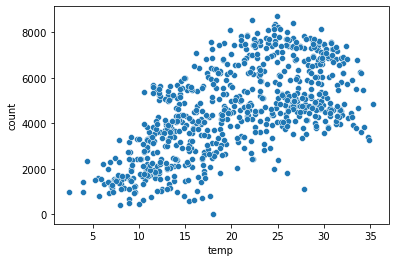

In [17]:
# Temperature
# creating a scatterplot to understand relationship of temperature to count
sb.scatterplot(x='temp', y='count', data=bike_data)
plt.show()

# Rental of bikes are observed more during higher temperature.

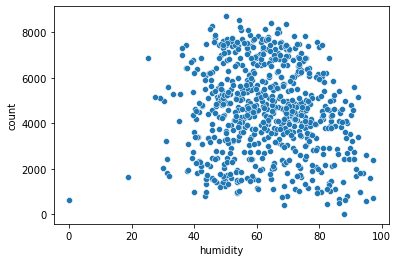

In [18]:
# humidity
# creating a scatterplot to understand relationship of humidity to count
sb.scatterplot(x='humidity', y='count', data=bike_data)
plt.show()

# High rentals are observed when the humidity is on the higher side.

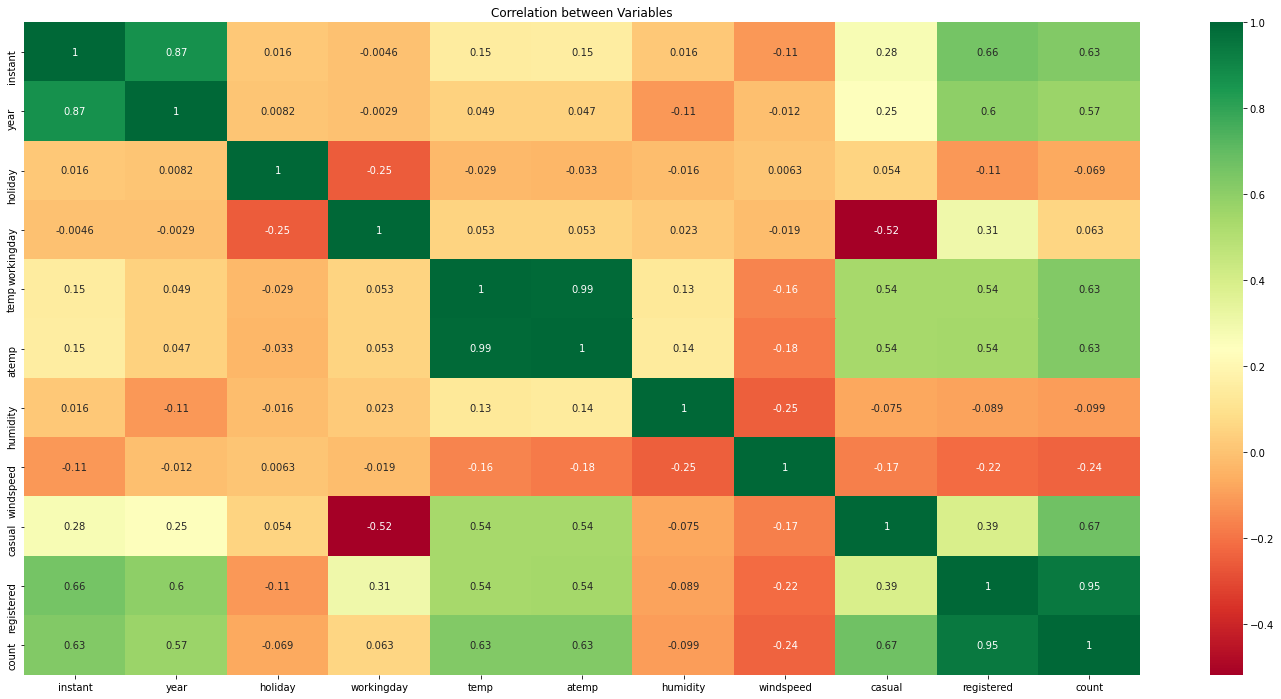

In [19]:
#  Creating Heatmap to see correlation between the variables
plt.figure(figsize=(25, 12))
sb.heatmap(bike_data.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables")
plt.show()

# As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable

# We can also see some other variables are also most correlated.
# Both the plots above helps to interpret the data well and identify the variables that can turn out to be useful in building the model

# So it is very much possible that we can consider a Linear Regression Model.

# Drop the unnecessary variables from the dataset
# We can see the dataset has some variables that are not required. We can drop instant, dteday, casual, registered

In [20]:
# drop unnecessary columns
bike_data=bike_data.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [21]:
# Checking datatypes of all the columns now.
bike_data.dtypes

season         object
year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

# Step 4: Data Preparation

In [22]:
# Dummy Variables
# Get the dummy variables for month, season, weathersit, weekday and dropping the first column from  using 'drop_first = True'pd.get_dummies(bike.season,drop_first=True)
months=pd.get_dummies(bike_data.month,drop_first=True)
weekdays=pd.get_dummies(bike_data.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike_data.weathersit,drop_first=True)
seasons=pd.get_dummies(bike_data.season,drop_first=True)

# Add the results to the original bike dataframe
bike_data=pd.concat([months,weekdays,weather_sit,seasons,bike_data],axis=1)
bike_data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [23]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike_data.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
bike_data.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [24]:
# checking the shape of the updated dataset
bike_data.shape

(730, 29)

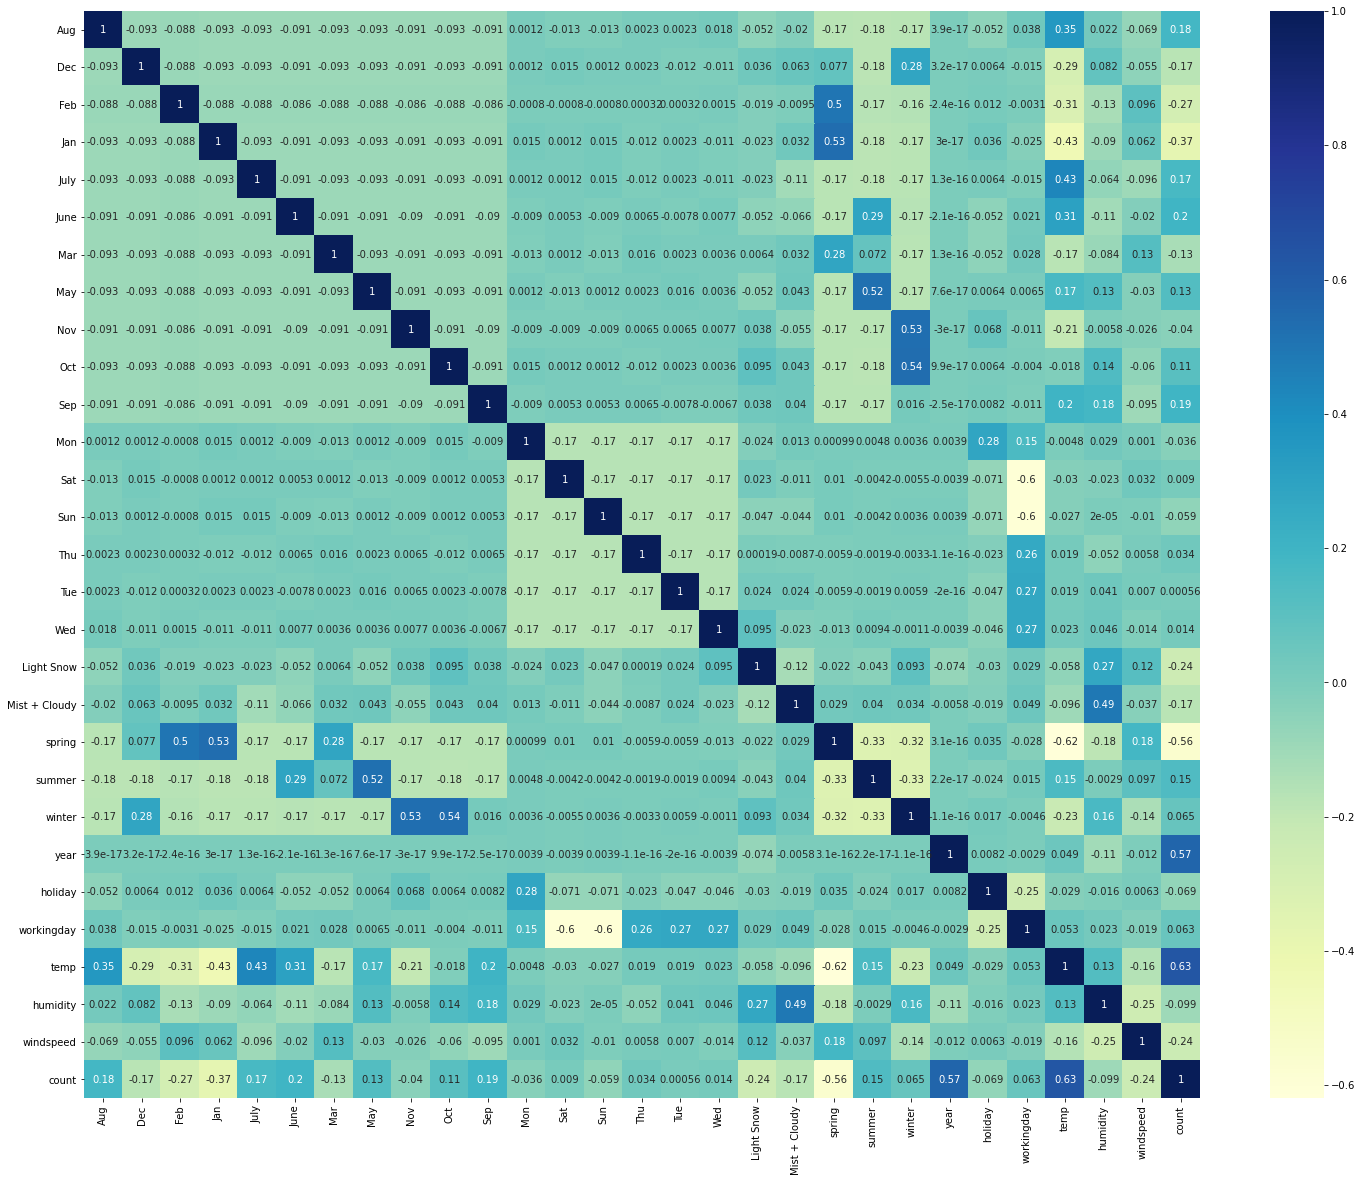

In [25]:
# Heatmap to check correlation between variables again
plt.figure(figsize=(25, 20))
sb.heatmap(bike_data.corr(), cmap='YlGnBu', annot = True)
plt.show()


# From the heatmap below we can observe that 
# temperature,Summer season,June to october months are in good correlation with the 'count' variable. 
# And seem to have good influence on the number of bike rentals.

# Step 4: Splitting data into Train and Test sets

In [26]:
# For building model we need to perform test and train split and scale the features
bike_train, bike_test = train_test_split(bike_data, train_size = 0.7, random_state = 100)

In [27]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [29]:
# Rescaling the features

# There are two common ways of rescaling:
# 1. Min-Max scaling (Normalisation):Between 0 and 1
# 2. Standardisation :mean-0, sigma-1

# Min-Max scaling
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [30]:
#Checking numeric variables(min and max) after scaling
bike_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


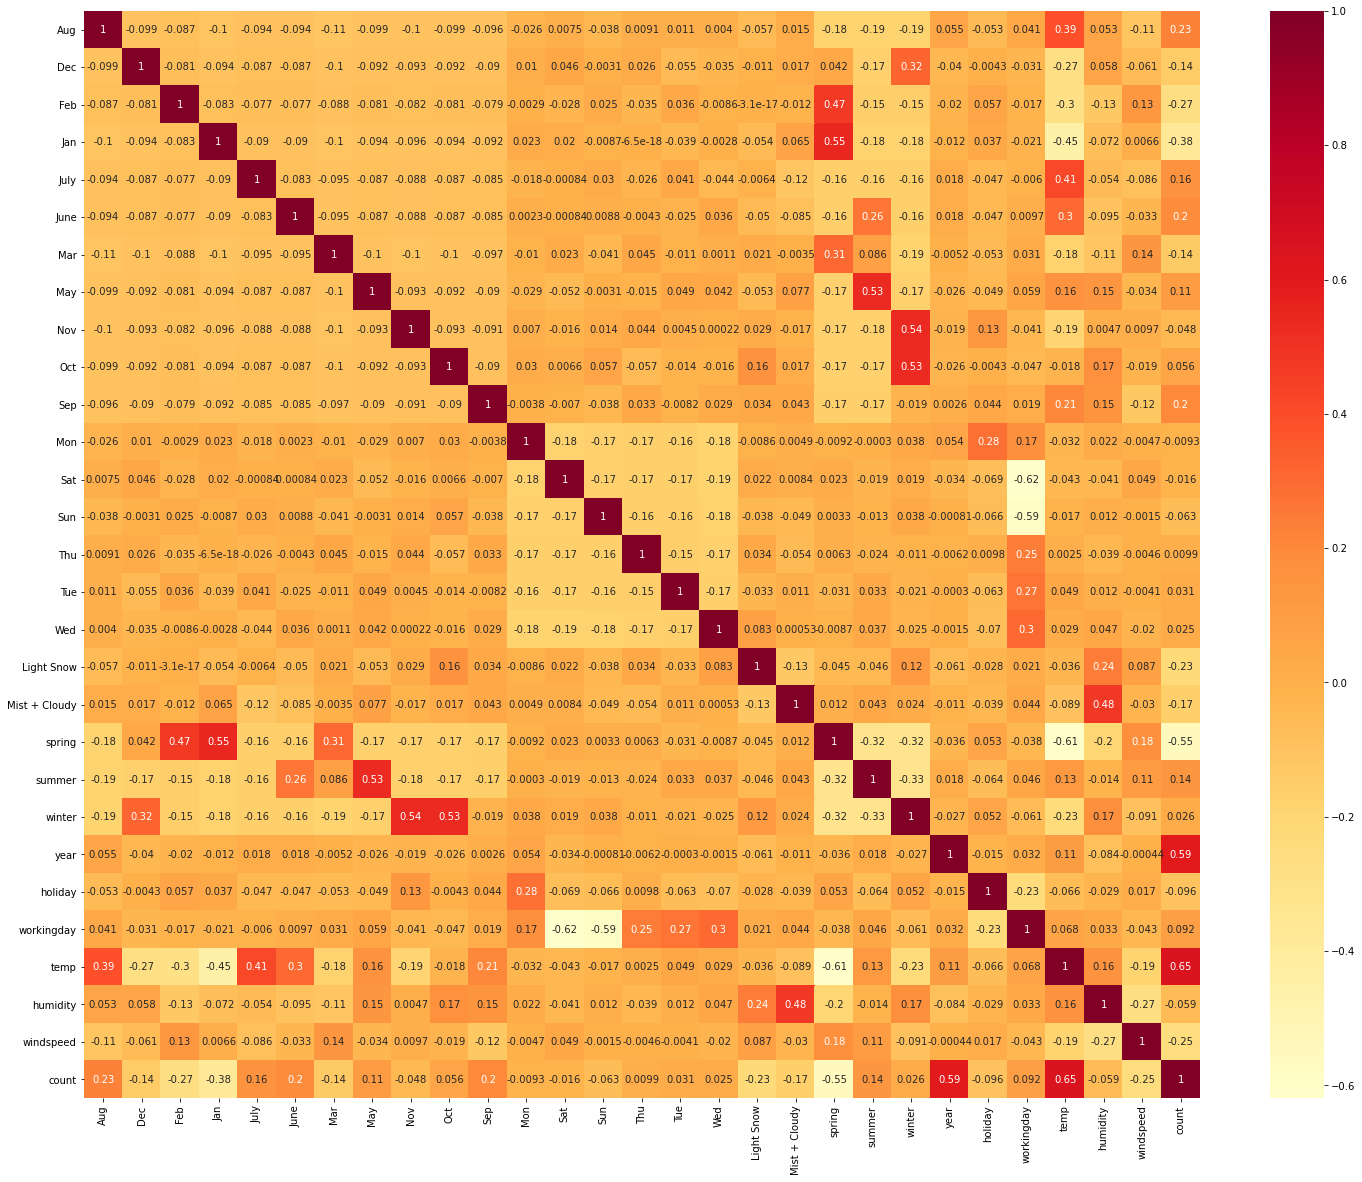

In [31]:
# Numeric variales are now mapped between 0 and 1
# Multicollinearity: 
# Assumes that predictors are not correlated with each other. If there is correlation among the predictors
# Checking the correlation coefficients to see which variables are highly correlated after scaling
# Little to no multicollinearity among predictors
plt.figure(figsize=(25, 20))
sb.heatmap(bike_train.corr(),cmap='YlOrRd',annot = True)
plt.show()

# From the heatmap we can see temp, year are correlated to the 'count' variable. 
# Even in August, September months we can see the counts are little high.

In [32]:
# Dividing data into x and y sets for the model building
y_train = bike_train.pop('count')
X_train = bike_train

In [33]:
X_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.380981


# Step 5: Linear Model

In [34]:
# RFE
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
# Selected variuables list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 5),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 6),
 ('Mar', False, 14),
 ('May', False, 12),
 ('Nov', False, 2),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 9),
 ('Wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [36]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Jan', 'July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy',
       'spring', 'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [37]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Thu',
       'Tue', 'Wed', 'summer'],
      dtype='object')

In [38]:
# For detailed statistics using statsmodel
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
# Build model

X_train_rfe = sm.add_constant(X_train_rfe)
#OLS best fit
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.51e-190
Time:                        23:33:41   Log-Likelihood:                 513.67
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2521      0.025      9.930      0.000       0.202       0.302
Jan              -0.0405      0.017     -2.321      0.021      -0.075      -0.006
July             -0.0746      0.017     -4.368      0.000      -0.108      -0.041
Sep               0.0599      0.015      3.896      0.000       0.030       0.090
Sat               0.1068      0.011      9.382      0.000       0.084       0.129
Sun               0.0537      0.012      4.494      0.000       0.030       0.077
Light Snow       -0.2525      0.026     -9.613      0.000      -0.304      -0.201
Mist + Cloudy    -0.0577      0.010     -5.513      0.000      -0.078      -0.037
spring           -0.0992      0.015     -6.499      0.000      -0.129      -0.069
winter            0.0517      0.012      4.169      0.000       0.027       0.076
year              0.2317      0.008     28.655      0.000       0.216       0.248
holiday          -0.0052      0.021     -0.246      0.806      -0.047       0.037
workingday        0.0968      0.009     10.442      0.000       0.079       0.115
temp              0.4596      0.031     14.626      0.000       0.398       0.521
humidity         -0.1434      0.038     -3.822      0.000      -0.217      -0.070
windspeed        -0.1758      0.026     -6.875      0.000      -0.226      -0.126
==============================================================================
Omnibus:                       62.892   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.883
Skew:                          -0.628   Prob(JB):                     1.91e-35
Kurtosis:                       5.438   Cond. No.                     1.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
# Dropping Constant
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

# Identify VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,41.54
3,Sat,10.13
4,Sun,9.81
12,temp,3.19
7,spring,2.71
10,holiday,2.58
13,humidity,1.89
8,winter,1.81
6,Mist + Cloudy,1.57
0,Jan,1.55


In [41]:
#  January is insignificant in presence of other variables due to high p-value and low VIF; can be dropped
X_train_new1=X_train_rfe.drop(['Jan'],axis=1)

In [42]:
# Rebuilding the model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.38e-190
Time:                        23:33:41   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2435      0.025      9.653

In [43]:
# Dropping Constant
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

# Identify VIF
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,workingday,40.65
2,Sat,9.92
3,Sun,9.64
11,temp,2.99
6,spring,2.55
9,holiday,2.54
12,humidity,1.89
7,winter,1.78
5,Mist + Cloudy,1.57
0,July,1.30


In [44]:
# Dropping workingday due to high VIF value
X_train_new2=X_train_lm1.drop(['workingday'],axis=1)

In [45]:
# Rebuilding the model
X_train_lm2= sm.add_constant(X_train_new2)
lm2= sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          9.38e-190
Time:                        23:33:42   Log-Likelihood:                 510.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     496   BIC:                            -934.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3383      0.031     10.938

In [46]:
# Dropping Constant
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

# Identify VIF
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,humidity,22.65
10,temp,15.31
12,windspeed,4.06
6,spring,2.55
5,Mist + Cloudy,2.25
7,winter,2.10
8,year,2.06
0,July,1.40
2,Sat,1.23
3,Sun,1.23


In [47]:
# Holiday variable seems to be insignificant, by looking at p value and low VIF. We can drop it
X_train_new3=X_train_lm2.drop(['holiday'],axis=1)

In [48]:
# Rebuilding the model
X_train_lm3= sm.add_constant(X_train_new3)
lm3= sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.60e-187
Time:                        23:33:43   Log-Likelihood:                 502.81
No. Observations:                 510   AIC:                            -979.6
Df Residuals:                     497   BIC:                            -924.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3359      0.031     10.702

In [49]:
# Dropping Constant
X_train_lm3 = X_train_lm3.drop(['const'], axis=1)

# Identify VIF
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,humidity,22.64
9,temp,15.31
11,windspeed,4.05
6,spring,2.54
5,Mist + Cloudy,2.25
7,winter,2.08
8,year,2.06
0,July,1.40
2,Sat,1.22
3,Sun,1.22


In [50]:
# humidity variable seems to be insignificant, by looking at p value and High VIF. We can drop it
X_train_new4=X_train_lm3.drop(['humidity'],axis=1)

In [51]:
# Rebuilding the model
X_train_lm4= sm.add_constant(X_train_new4)
lm4= sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.84e-185
Time:                        23:33:43   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2558      0.024     10.619

In [52]:
# Dropping Constant
X_train_lm4 = X_train_lm4.drop(['const'], axis=1)

# Identify VIF
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,4.72
10,windspeed,4.04
8,year,2.06
6,spring,1.66
5,Mist + Cloudy,1.52
7,winter,1.41
0,July,1.35
2,Sat,1.22
3,Sun,1.21
1,Sep,1.20


In [53]:
# Windspeed seems to be insignificant,by looking at high VIF and negative correlation with count. Lets drop it
X_train_new5=X_train_lm4.drop(['windspeed'],axis=1)

In [54]:
# Rebuilding the model
X_train_lm5= sm.add_constant(X_train_new5)
lm5= sm.OLS(y_train,X_train_lm5).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.84e-185
Time:                        23:33:44   Log-Likelihood:                 495.11
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     498   BIC:                            -915.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2558      0.024     10.619

In [55]:
# Dropping Constant
X_train_lm6 = X_train_lm5.drop(['const'], axis=1)

# Identify VIF
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,3.19
8,year,2.05
5,Mist + Cloudy,1.51
7,winter,1.35
0,July,1.33
6,spring,1.28
2,Sat,1.21
3,Sun,1.20
1,Sep,1.18
4,Light Snow,1.06


In [56]:
# Now!!, We have our model
# The p values represent the significance of the variables and VIF which represent how variables 
# are correlated to each other. Based on these two parameters we decided which variable to drop.
# The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions 
# using this model only.
# - The p-value for each term tests the null hypothesis that the coefficient is equal to zero 
# (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.

# - A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity. 
#   In our case, with values less than 5, we are in good shape, and can proceed with our regression

# - R-squared measures the strength of the relationship between your model and the dependent 
#   variable on a convenient 0 – 100% scale. And we have the R-square value of 0.822 or 82.2%

# - The adjusted R-squared adjusts for the number of terms in the model. 
#   And we got it around 0.819 or 81.9%

In [59]:
# Still checking one more model keeping windspeed and dropping atemp
#Drop temp for the lm4 model 
X_train_new7=X_train_lm5.drop(['temp'], axis=1)

In [60]:
#Building a model
X_train_lm7= sm.add_constant(X_train_new7)
lm6=sm.OLS(y_train,X_train_lm7).fit()
print(lm6.summary())


# Here we see a good drop for R squared, Sothis is not a very good model.

# So our final model is lm5 
# which is obtained by removing:- 
# January, workingday, holiday, humidity and windspeed variables from the RFE support columns

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.14e-141
Time:                        23:34:12   Log-Likelihood:                 384.23
No. Observations:                 510   AIC:                            -748.5
Df Residuals:                     500   BIC:                            -706.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5033      0.011     45.046

# Step 6: Residual Analysis of the train data

In [61]:
# Checking if the error terms are also normally distributed 
# (which is infact, one of the major assumptions of linear regression), 
# Plotting the histogram of the error terms and seeing what it looks like

In [62]:
X_train_lm5

,const,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,year,temp
576,1.0,1,0,0,0,0,0,0,0,1,0.815169
426,1.0,0,0,1,0,0,1,1,0,1,0.442393
728,1.0,0,0,0,1,0,0,1,0,1,0.245101
482,1.0,0,0,1,0,0,1,0,0,1,0.395666
111,1.0,0,0,0,0,0,1,0,0,0,0.345824
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,0,1,0.863973
53,1.0,0,0,0,0,0,0,1,0,0,0.202618
350,1.0,0,0,1,0,0,1,0,1,0,0.248216
79,1.0,0,0,0,0,0,1,0,0,0,0.462664


In [63]:
#y train predicted
y_train_pred = lm5.predict(X_train_lm5)

<Figure size 432x288 with 0 Axes>

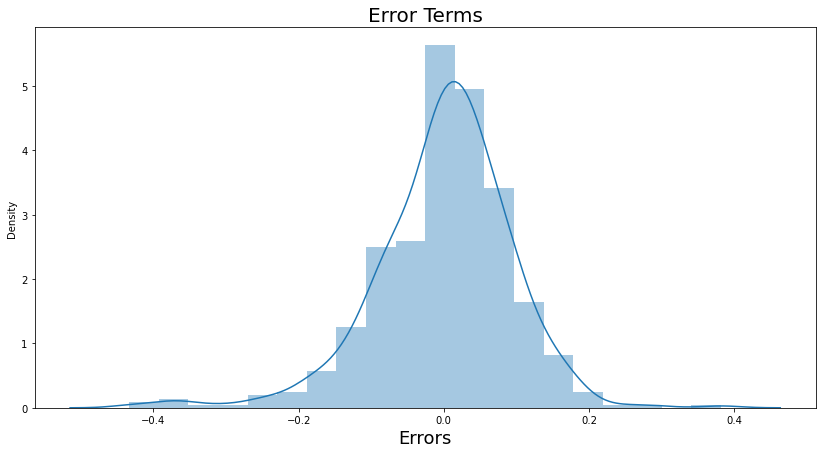

In [64]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sb.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

# We can see Error terms are normally distributed

# Step 7: Making Predictions

In [65]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [66]:
# Dividing into X_test and y_test
y_test = bike_test.pop('count')
X_test = bike_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [67]:
#Columns
X_train_new5.columns

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'winter', 'year', 'temp'],
      dtype='object')

In [68]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,winter,year,temp
184,1.0,1,0,0,0,0,1,0,0,0,0.831783
535,1.0,0,0,0,0,0,0,0,0,1,0.901354
299,1.0,0,0,0,0,0,1,0,1,0,0.511964
221,1.0,0,0,0,0,0,0,0,0,0,0.881625
152,1.0,0,0,0,0,0,0,0,0,0,0.817246


In [69]:
# Making predictions
y_pred = lm5.predict(X_test_new1)
y_pred

184    0.443950
535    0.854735
299    0.411994
221    0.611697
152    0.581426
         ...   
702    0.727249
127    0.429935
640    0.755607
72     0.238363
653    0.722855
Length: 220, dtype: float64

# Finding R-squared and Adjusted R-Squared for Test set

In [70]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8118675678829634

In [76]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(1-0.8118675678829634)*(11-1)/(11-1-1)
print(Adj_r2)

0.7909639643144039


# Step 8: Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

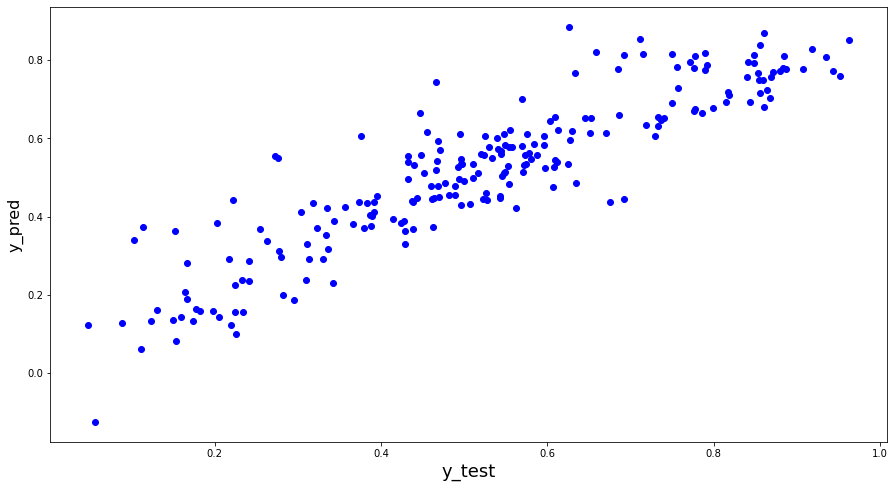

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

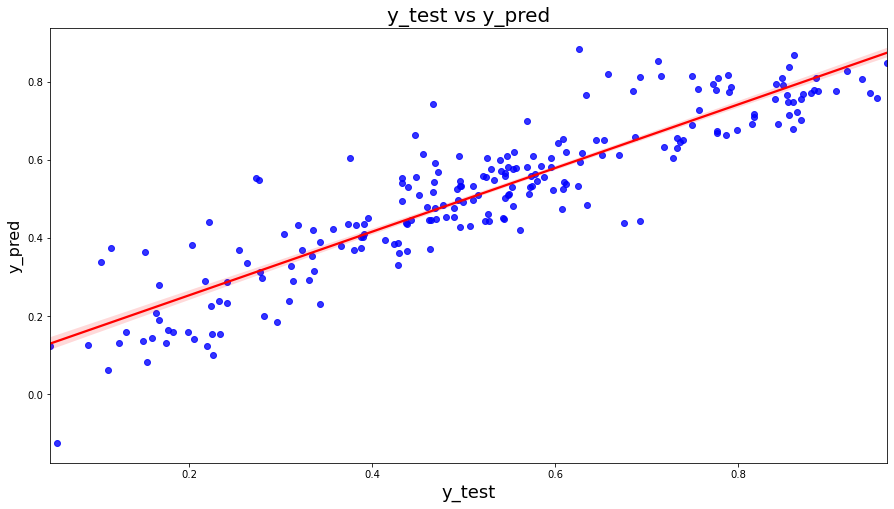

In [75]:
# Visualising the fit on the test set
#Regression plot
plt.figure(figsize=(15,8))
sb.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

# We can see that the equation of our best fitted line is:

count=0.4502×temp+0.2349×year+0.0435×winter+0.0154×sat+0.0521×sep-0.1425×windspeed-0.1148×spring−0.0797×misty+cloud−0.2860×light snow−0.0415×sun-0.0704xJuly

Final Result Comparison between Train model and Test:
- Train R^2 : 0.812
- Train Adjusted R^2 : 0.80
- Test R^2: 0.833
- Test Adjusted R^2: 0.829
- Difference in R^2 between train and test: 2.5%
- Difference in adjusted R^2 between Train and test:3.5%

Yes! Its a best model
Interpretation:
- We arrived at a very decent model for the the demand for shared bikes with the significant variables
- We can see that temperature variable is having the highest coefficient 0.4502, which means if the temperature increases by one unit the number of bike rentals increases by 0.4502 units.
Similary we can see coefficients of other variables in the equation for best fitted line.
We also see there are some variables with negative coefficients, A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have spring, mist cloudy , light snow, sunday and july variables with negative coefficient. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.
Business Goals:
- A US bike-sharing provider BoomBikes can focus more on Temperature
- We can see demand for bikes was more in 2019 than 2018, so just focus as there is increase in 2019 and might be facing dips in their revenues due to the ongoing Corona pandemic and by the time it reduces the things will be better
- Can focus more on Summer & Winter season, August, September month, Weekends, Working days as they have good influence on bike rentals.
- We can see spring season has negative coefficients and negatively correlated to bike rentals. So we can give some offers there to increase the demand
- Now seeing to weathersit variable, we have got negative coefficients for Mist +cloudy and Lightsnow weather... And yes we can give offers